## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
from tensorflow.keras import activations

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    x = BatchNormalization()(input_layer)

    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)            
            x = keras.layers.Activation(activations.relu)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = keras.layers.Activation(activations.relu)(x)

    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 2, 16, 32, 128, 256
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batch_size in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with batch size = %.6f" % (batch_size))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size,
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-batch-size-%s" % str(batch_size)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with batch size = 2.000000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activat

50000/50000 [==============================] - 516s 10ms/step - loss: 2.2804 - accuracy: 0.1312 - val_loss: 2.2616 - val_accuracy: 0.1475
Epoch 43/50
50000/50000 [==============================] - 517s 10ms/step - loss: 2.2787 - accuracy: 0.1354 - val_loss: 2.2772 - val_accuracy: 0.1277
Epoch 44/50
50000/50000 [==============================] - 520s 10ms/step - loss: 2.2813 - accuracy: 0.1351 - val_loss: 2.2786 - val_accuracy: 0.1253
Epoch 45/50
50000/50000 [==============================] - 516s 10ms/step - loss: 2.2787 - accuracy: 0.1373 - val_loss: 2.2654 - val_accuracy: 0.1385
Epoch 46/50
50000/50000 [==============================] - 522s 10ms/step - loss: 2.2801 - accuracy: 0.1362 - val_loss: 2.2700 - val_accuracy: 0.1381
Epoch 47/50
50000/50000 [==============================] - 518s 10ms/step - loss: 2.2784 - accuracy: 0.1362 - val_loss: 2.2617 - val_accuracy: 0.1423
Epoch 48/50
50000/50000 [==============================] - 514s 10ms/step - loss: 2.2738 - accuracy: 0.1406 - va

50000/50000 [==============================] - 69s 1ms/step - loss: 0.6388 - accuracy: 0.7739 - val_loss: 1.8888 - val_accuracy: 0.4806
Epoch 35/50
50000/50000 [==============================] - 70s 1ms/step - loss: 0.6297 - accuracy: 0.7789 - val_loss: 1.6716 - val_accuracy: 0.5120
Epoch 36/50
50000/50000 [==============================] - 70s 1ms/step - loss: 0.6198 - accuracy: 0.7802 - val_loss: 1.7135 - val_accuracy: 0.5069
Epoch 37/50
50000/50000 [==============================] - 69s 1ms/step - loss: 0.6040 - accuracy: 0.7847 - val_loss: 1.7543 - val_accuracy: 0.5057
Epoch 38/50
50000/50000 [==============================] - 67s 1ms/step - loss: 0.5925 - accuracy: 0.7909 - val_loss: 1.7183 - val_accuracy: 0.5094
Epoch 39/50
50000/50000 [==============================] - 68s 1ms/step - loss: 0.5783 - accuracy: 0.7946 - val_loss: 1.7806 - val_accuracy: 0.5015
Epoch 40/50
50000/50000 [==============================] - 70s 1ms/step - loss: 0.5727 - accuracy: 0.7977 - val_loss: 1.8967

50000/50000 [==============================] - 36s 726us/step - loss: 0.4673 - accuracy: 0.8358 - val_loss: 1.9699 - val_accuracy: 0.4891
Epoch 27/50
50000/50000 [==============================] - 37s 736us/step - loss: 0.4484 - accuracy: 0.8416 - val_loss: 2.2578 - val_accuracy: 0.4657
Epoch 28/50
50000/50000 [==============================] - 37s 743us/step - loss: 0.4279 - accuracy: 0.8491 - val_loss: 2.1762 - val_accuracy: 0.4766
Epoch 29/50
50000/50000 [==============================] - 37s 744us/step - loss: 0.4110 - accuracy: 0.8556 - val_loss: 1.9035 - val_accuracy: 0.5077
Epoch 30/50
50000/50000 [==============================] - 37s 743us/step - loss: 0.3988 - accuracy: 0.8593 - val_loss: 2.1572 - val_accuracy: 0.4797
Epoch 31/50
50000/50000 [==============================] - 37s 737us/step - loss: 0.3891 - accuracy: 0.8629 - val_loss: 2.2083 - val_accuracy: 0.4995
Epoch 32/50
50000/50000 [==============================] - 37s 743us/step - loss: 0.3769 - accuracy: 0.8661 - va

50000/50000 [==============================] - 14s 286us/step - loss: 0.4355 - accuracy: 0.8604 - val_loss: 2.2312 - val_accuracy: 0.4207
Epoch 19/50
50000/50000 [==============================] - 14s 284us/step - loss: 0.4001 - accuracy: 0.8722 - val_loss: 2.0155 - val_accuracy: 0.4565
Epoch 20/50
50000/50000 [==============================] - 14s 282us/step - loss: 0.3604 - accuracy: 0.8868 - val_loss: 2.3257 - val_accuracy: 0.4086
Epoch 21/50
50000/50000 [==============================] - 14s 284us/step - loss: 0.3408 - accuracy: 0.8924 - val_loss: 2.1061 - val_accuracy: 0.4515
Epoch 22/50
50000/50000 [==============================] - 14s 286us/step - loss: 0.3101 - accuracy: 0.9030 - val_loss: 2.3210 - val_accuracy: 0.4362
Epoch 23/50
50000/50000 [==============================] - 14s 285us/step - loss: 0.2754 - accuracy: 0.9177 - val_loss: 2.3001 - val_accuracy: 0.4427
Epoch 24/50
50000/50000 [==============================] - 14s 285us/step - loss: 0.2580 - accuracy: 0.9206 - va

50000/50000 [==============================] - 11s 210us/step - loss: 0.9760 - accuracy: 0.6695 - val_loss: 1.4483 - val_accuracy: 0.4901
Epoch 11/50
50000/50000 [==============================] - 11s 212us/step - loss: 0.9239 - accuracy: 0.6891 - val_loss: 1.4949 - val_accuracy: 0.4830
Epoch 12/50
50000/50000 [==============================] - 11s 215us/step - loss: 0.8752 - accuracy: 0.7063 - val_loss: 1.5470 - val_accuracy: 0.4781
Epoch 13/50
50000/50000 [==============================] - 11s 217us/step - loss: 0.8217 - accuracy: 0.7272 - val_loss: 1.5694 - val_accuracy: 0.4771
Epoch 14/50
50000/50000 [==============================] - 11s 218us/step - loss: 0.7712 - accuracy: 0.7477 - val_loss: 1.6087 - val_accuracy: 0.4623
Epoch 15/50
50000/50000 [==============================] - 11s 222us/step - loss: 0.7227 - accuracy: 0.7661 - val_loss: 1.7186 - val_accuracy: 0.4429
Epoch 16/50
50000/50000 [==============================] - 11s 223us/step - loss: 0.6714 - accuracy: 0.7862 - va

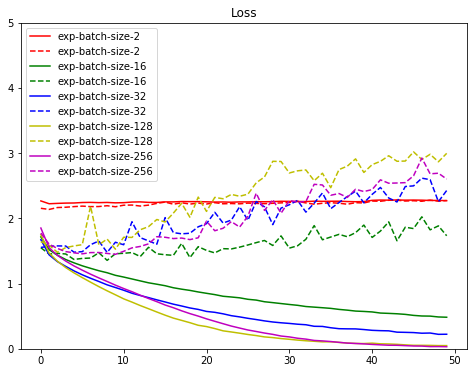

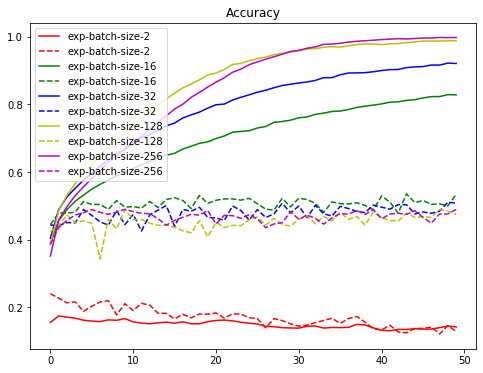

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()